In [1]:
from galpy.potential import MWPotential2014, KeplerPotential, evaluateDensities, evaluateRforces, evaluateR2derivs, plotDensities, plotRotcurve, TwoPowerTriaxialPotential, NFWPotential, evaluatezforces, evaluatephiforces, evaluater2derivs, evaluaterforces, evaluateRzderivs, evaluatez2derivs
from galpy.potential.mwpotentials import DehnenBinney98I, Irrgang13I
from galpy.orbit import Orbit
from galpy.util import bovy_conversion
from galpy.util.bovy_conversion import get_physical
from astropy import units
from astropy.units import imperial
imperial.enable()
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G, parsec, giga, year
G *= (bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0)*1000.0*parsec)**(-3.0) * (bovy_conversion.mass_in_msol(220.0, 8.0)*(2.0*10.0**30.0)) * (bovy_conversion.time_in_Gyr(220.0,8.0)*giga*year)**(2.0)

In [2]:
#Add black hole at the centre of the Galaxy
#MWPotential2014.append(KeplerPotential(amp=4*10**6./bovy_conversion.mass_in_msol(220.,8.)))

In [3]:
#Function to calculate Jacobi radius
def jacobiRadius(potential, R, z, phi, t, M_b):
    dPhidR = -evaluateRforces(potential, R, z, phi=phi, t=t)
    d2PhidR2 = evaluateR2derivs(potential, R, z, phi=phi, t=t)
    return (G*M_b *(dPhidR/R - d2PhidR2)**(-1.0))**(1.0/3.0)

In [4]:
def myJacobiRadius(orbit, M_b, M_gal, e_binary):
    return (M_b/M_gal)**(1.0/3.0)*((1.0-e_binary)/(1.0+e_binary))**(1.0/3.0)*(1.0+orbit.e())**(1.0/3.0)*orbit.rperi()

In [5]:
#o = Orbit(vxvv=[1.,0.1,1.1,0.,0.1,0.])
#o = Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))
#o = Orbit(**get_physical(DehnenBinney98I))
#o.turn_physical_off()
#o.flip(inplace = True)

In [6]:
#Integration time
ts = np.linspace(0.,-10.0,3001)*units.Gyr
N_t = np.size(ts)

In [7]:
#Integrate orbit
#o.integrate(ts, MWPotential2014)
#o.integrate(ts, DehnenBinney98I)

In [8]:
#o.plot(vo=220.0, ro=8.0)
#o.plot(**get_physical(DehnenBinney98I))

In [9]:
#orbits = [Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#labels = ['NLTT 10536', 'NLTT 16394', 'NLTT 39456']
#overp = [False, True, True]
#xplots = ['R', 'R', 'R']

#orbits = [Orbit([227.55005147436, -16.39466183454, 0.0294229, -997.999, -3542.377, 310.88], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#labels = ['NLTT 39456 manual', 'NLTT 39456 auto']

#orbits = [Orbit([049.62122952700, -07.14196049755, 0.225927, 169.224, -355.297, 152.28], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I))]

#Quinn binaries
orbits = [Orbit([49.62049, -7.14044, 0.219, 171, -353, 121.6], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I)), Orbit([85.91593, 49.38367, 0.210, 81, -176, 262.3], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.348, 328, -172, 268.2], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 39456', **get_physical(DehnenBinney98I))]
#orbits = [Orbit([49.62049, -7.14044, 0.219, 171, -353, 121.6], radec=True, **get_physical(Irrgang13I)), Orbit.from_name('NLTT 10536', **get_physical(Irrgang13I)), Orbit([85.91593, 49.38367, 0.210, 81, -176, 262.3], radec=True, **get_physical(Irrgang13I)), Orbit([94.91613, -30.70087, 0.348, 328, -172, 268.2], radec=True, **get_physical(Irrgang13I)), Orbit.from_name('NLTT 16394', **get_physical(Irrgang13I)), Orbit.from_name('NLTT 39456', **get_physical(Irrgang13I))]
labels = ['NLTT 10536 Quinn', 'NLTT 10536 SIMBAD', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn', 'NLTT 16394 SIMBAD', 'NLTT 39456 SIMBAD']
#for orbi,label in zip(orbits,labels):
    #print(label)
    #print("r initial, kpc =", orbi.r())
    #print("v initial, km/s =", np.sqrt(orbi.vx()**2.0 + orbi.vy()**2.0 + orbi.vz()**2.0))
'''
#Allen and Santillan binaries
initial_conditions = [[8.499*units.kpc, 68.2*units.km/units.s, 131.8*units.km/units.s, -0.004*units.kpc, -29.4*units.km/units.s, 0.0*units.deg],
                     [8.504*units.kpc, -103.7*units.km/units.s, 219.4*units.km/units.s, -0.003*units.kpc, -33.8*units.km/units.s, 0.0*units.deg],
                     [8.501*units.kpc, -28.2*units.km/units.s, -57.1*units.km/units.s, -0.002*units.kpc, -46.4*units.km/units.s, 0.0*units.deg],
                     [8.501*units.kpc, -54.7*units.km/units.s, 178.1*units.km/units.s, 0.002*units.kpc, -67.6*units.km/units.s, 0.0*units.deg],
                     [8.502*units.kpc, -79.9*units.km/units.s, 171.1*units.km/units.s, 0.003*units.kpc, -71.4*units.km/units.s, 0.0*units.deg],
                     [8.498*units.kpc, 129.4*units.km/units.s, 236.5*units.km/units.s, 0.000*units.kpc, 24.6*units.km/units.s, 0.0*units.deg],
                     [8.499*units.kpc, 81.4*units.km/units.s, 177.5*units.km/units.s, 0.000*units.kpc, -2.2*units.km/units.s, 0.0*units.deg],
                     [8.498*units.kpc, 68.4*units.km/units.s, 193.0*units.km/units.s, -0.003*units.kpc, 9.8*units.km/units.s, 0.0*units.deg],
                     [8.499*units.kpc, 92.7*units.km/units.s, 216.3*units.km/units.s, -0.003*units.kpc, -50.9*units.km/units.s, 0.0*units.deg],
                     [8.501*units.kpc, -42.5*units.km/units.s, 153.5*units.km/units.s, -0.001*units.kpc, 7.3*units.km/units.s, 0.0*units.deg],
                     [8.474*units.kpc, -313.6*units.km/units.s, -340.6*units.km/units.s, 0.019*units.kpc, -98.4*units.km/units.s, 0.0*units.deg],
                     [8.474*units.kpc, -321.8*units.km/units.s, -342.4*units.km/units.s, 0.019*units.kpc, -93.1*units.km/units.s, 0.0*units.deg]]
orbits = [Orbit(ics, **get_physical(Irrgang13I)) for ics in initial_conditions]
labels = ['GL1', 'GL166', 'GL191', 'GL411', 'GL445', 'GL699', 'GL820', 'GL845', 'GL887', 'GL905', 'LDS519A', 'LDS519B']
'''

#NLTT 16394
#orbits = [Orbit([94.91613, -30.70087, 0.348, 328, -172, 268.2], radec=True, **get_physical(DehnenBinney98I))]
#orbits = [Orbit([94.91613, -30.70087, 0.348, 328, -172, 268.2], radec=True, **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.348, 328, -172, 134.1], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.348, 328, -172, 536.4], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.174, 328, -172, 268.2], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.696, 328, -172, 268.2], radec=True, **get_physical(DehnenBinney98I))]
#labels = ['NLTT 16394 Quinn', 'NLTT 16394 SIMBAD', 'NLTT 16394 IC1', 'NLTT 16394 IC3', 'NLTT 16394 IC4', 'NLTT 16394 IC6']

#NLTT 15501
#orbits = [Orbit([85.91593, 49.38367, 0.210, 81, -176, 262.3], radec=True, **get_physical(DehnenBinney98I))]
#labels = ['NLTT 15501 Quinn']

#orbits = [Orbit.from_name('NLTT 16394', **get_physical(DehnenBinney98I)), Orbit.from_name('NLTT 10536', **get_physical(DehnenBinney98I)), Orbit([49.62049, -7.14044, 0.219, 171, -353, 121.6], radec=True, **get_physical(DehnenBinney98I)), Orbit([49.62049, -7.14044, 0.219*1.1, 171, -353, 121.6], radec=True, **get_physical(DehnenBinney98I)), Orbit([49.62049, -7.14044, 0.219, 171, -353, 121.6*1.1], radec=True, **get_physical(DehnenBinney98I))]
#labels = ['NLTT 16394 SIMBAD', 'NLTT 10536 SIMBAD', 'NLTT 10536 Quinn', 'NLTT 10536 Quinn distance*1.1', 'NLTT 10536 Quinn Vlos*1.1']

#Alter initial conditions
#orbits = [Orbit([49.62049, -7.14044, 0.219, 171, -353*1.1, 121.6], radec=True, **get_physical(DehnenBinney98I)), Orbit([85.91593, 49.38367, 0.210, 81, -176*1.1, 262.3], radec=True, **get_physical(DehnenBinney98I)), Orbit([94.91613, -30.70087, 0.348, 328, -172*1.1, 268.2], radec=True, **get_physical(DehnenBinney98I))]

#orbits = [Orbit(**get_physical(DehnenBinney98I))]
#orbits = [Orbit()]
#labels = ['The Sun']

for orbi in orbits:
    orbi.turn_physical_off()
    #orbi.integrate(ts, MWPotential2014)
    orbi.integrate(ts, DehnenBinney98I)
    #orbi.integrate(ts, Irrgang13I)

In [10]:
#Find strongest Galactic force felt by star
pot = MWPotential2014
for o,l in zip(orbits, labels):
    strongest_difference_in_force_felt = 0.0
    for i in range(N_t):
        R_force = evaluateRforces(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        z_force = evaluatezforces(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        phi_force = evaluatephiforces(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        r_force = evaluaterforces(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        total_force = np.sqrt(R_force**2.0 + z_force**2.0 + phi_force**2.0)
        total_angular_force = np.sqrt(total_force**2.0 - r_force**2.0)
        strongest_difference_in_force_felt = max(total_force, strongest_difference_in_force_felt)
    print(l)
    print("Strongest Galactic force felt, km/s/Myr =", strongest_difference_in_force_felt*bovy_conversion.force_in_kmsMyr(220.,8.))
    print("Strongest Galactic force felt, km/s/Myr =", strongest_difference_in_force_felt)

NLTT 10536 Quinn
Strongest Galactic force felt, km/s/Myr = 6.085604774301153
Strongest Galactic force felt, km/s/Myr = 0.9835466136344664
NLTT 10536 SIMBAD
Strongest Galactic force felt, km/s/Myr = 6.082908295467898
Strongest Galactic force felt, km/s/Myr = 0.983110812637927
NLTT 15501 Quinn
Strongest Galactic force felt, km/s/Myr = 6.013953290208007
Strongest Galactic force felt, km/s/Myr = 0.9719664047389929
NLTT 16394 Quinn
Strongest Galactic force felt, km/s/Myr = 6.038524815596526
Strongest Galactic force felt, km/s/Myr = 0.9759376190199083
NLTT 16394 SIMBAD
Strongest Galactic force felt, km/s/Myr = 6.106103664430975
Strongest Galactic force felt, km/s/Myr = 0.9868596145141146
NLTT 39456 SIMBAD
Strongest Galactic force felt, km/s/Myr = 6.211593684946657
Strongest Galactic force felt, km/s/Myr = 1.00390875856773


In [11]:
#Strongest difference in force between the two stars
pot = MWPotential2014
r_bin = np.array([10.0, 0.0, 0.0])/(1000.0*bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0))
for o,l in zip(orbits,labels):
    strongest_difference_in_force = 0.0
    for i in range(N_t):
        R2derivs = evaluateR2derivs(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        Rzderivs = evaluateRzderivs(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        z2derivs = evaluatez2derivs(pot, o.R(t=ts[i]), o.z(t=ts[i]), phi=o.phi(t=ts[i]), t=ts[i])
        difference_in_force = np.sqrt((r_bin[0]*R2derivs + r_bin[2]*Rzderivs)**2.0 + (r_bin[0]*Rzderivs + r_bin[2]*z2derivs)**2.0)
        strongest_difference_in_force = max(strongest_difference_in_force, difference_in_force)
    print(l)
    print("Strongest difference in force =", strongest_difference_in_force*bovy_conversion.force_in_kmsMyr(220.,8.))
    print("Strongest difference in force =", strongest_difference_in_force)

NLTT 10536 Quinn
Strongest difference in force = 1.1611827418948644e-05
Strongest difference in force = 1.8766866991171475e-06
NLTT 10536 SIMBAD
Strongest difference in force = 1.1612758910293613e-05
Strongest difference in force = 1.876837245396762e-06
NLTT 15501 Quinn
Strongest difference in force = 1.1242954181758567e-05
Strongest difference in force = 1.8170699417439504e-06
NLTT 16394 Quinn
Strongest difference in force = 1.1373541421494238e-05
Strongest difference in force = 1.8381752619527604e-06
NLTT 16394 SIMBAD
Strongest difference in force = 1.1513861672469492e-05
Strongest difference in force = 1.8608536173158722e-06
NLTT 39456 SIMBAD
Strongest difference in force = 1.1844559105645591e-05
Strongest difference in force = 1.914300456636014e-06


In [12]:
#Find time corresponding to minimum R
for o,l in zip(orbits,labels):
    R_min = o.R(t=ts[0])
    t_min = ts[0]
    for t in ts:
        if (o.R(t=t) < R_min):
            R_min = o.R(t=t)
            t_min = t
    #Calculate Jacobi radius
    r_J = jacobiRadius(MWPotential2014, o.R (t=t_min), o.z(t=t_min), o.phi(t=t_min), t_min, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0))
    print(l)
    print("r_peri =", o.rperi())
    print('e_gal =', o.e())
    print('Jacobi radius, pc =', r_J*1000.0*bovy_conversion.velocity_in_kpcGyr(220.0, 8.0)/bovy_conversion.time_in_Gyr(220.0,8.0))
    print('My Jacobi radius, pc = ', myJacobiRadius(o, 2.0/bovy_conversion.mass_in_msol(220.0, 8.0), 10.0**11.0/bovy_conversion.mass_in_msol(220.0, 8.0), 0.7)*1000.0)

NLTT 10536 Quinn
r_peri = 0.8012871089929029
e_gal = 0.17487549351966725
Jacobi radius, pc = 1.7554818103501684
My Jacobi radius, pc =  0.12873191029456224
NLTT 10536 SIMBAD
r_peri = 0.9682114791179792
e_gal = 0.14299092008071015
Jacobi radius, pc = 1.7563695652233502
My Jacobi radius, pc =  0.15412932050852876
NLTT 15501 Quinn
r_peri = 0.28004250282849524
e_gal = 0.838200262313098
Jacobi radius, pc = 1.7614267221044808
My Jacobi radius, pc =  0.052230277670712935
NLTT 16394 Quinn
r_peri = 0.9363329088855903
e_gal = 0.9225434330396275
Jacobi radius, pc = 1.759491229886481
My Jacobi radius, pc =  0.17726504989833544
NLTT 16394 SIMBAD
r_peri = 0.6983369289307264
e_gal = 0.20147987328560854
Jacobi radius, pc = 1.7452416137585407
My Jacobi radius, pc =  0.11303283448177197
NLTT 39456 SIMBAD
r_peri = 0.58902481005668
e_gal = 0.8667268389047241
Jacobi radius, pc = 1.7279425230824246
My Jacobi radius, pc =  0.11042344396525888


In [13]:
#Evaluate average dark matter density and stellar density
#db = DehnenBinney98I
#db = [x.turn_physical_on(**get_physical(DehnenBinney98I)) for x in DehnenBinney98I]
#plotDensities(Pot=db, rmin = 0.1*units.kpc, rmax=1.5*units.kpc, zmin=-0.5*units.kpc, zmax=0.5*units.kpc)
#plt.show()
for orbi,label in zip(orbits,labels):
    avg_dm_density = 0.0
    avg_stellar_density = 0.0
    #orbi.turn_physical_on(**get_physical(MWPotential2014))
    for i in range(N_t):
        #avg_dm_density += evaluateDensities(MWPotential2014[2], orbi.R(ts[i].value), orbi.z(ts[i].value), phi=orbi.phi(ts[i].value), t=ts[i])/N_t*bovy_conversion.dens_in_msolpc3(220.0, 8.0)
        #avg_stellar_density += evaluateDensities(MWPotential2014[0], orbi.R(ts[i].value), orbi.z(ts[i].value), phi=orbi.phi(ts[i].value), t=ts[i])/N_t + evaluateDensities(MWPotential2014[1], orbi.R(ts[i].value), orbi.z(ts[i].value), phi=orbi.phi(ts[i].value), t=ts[i])/N_t*bovy_conversion.dens_in_msolpc3(220.0, 8.0)
        #avg_dm_density += evaluateDensities(DehnenBinney98I[2], orbi.R(ts[i].value, **get_physical(DehnenBinney98I)), orbi.z(ts[i].value, **get_physical(DehnenBinney98I)), phi=orbi.phi(ts[i].value, **get_physical(DehnenBinney98I)), t=ts[i])/N_t
        #avg_stellar_density += evaluateDensities(DehnenBinney98I[0], orbi.R(ts[i].value, **get_physical(DehnenBinney98I)), orbi.z(ts[i].value, **get_physical(DehnenBinney98I)), phi=orbi.phi(ts[i].value, **get_physical(DehnenBinney98I)), t=ts[i])/N_t + evaluateDensities(DehnenBinney98I[1], orbi.R(ts[i].value, **get_physical(DehnenBinney98I)), orbi.z(ts[i].value, **get_physical(DehnenBinney98I)), phi=orbi.phi(ts[i].value, **get_physical(DehnenBinney98I)), t=ts[i])/N_t
        avg_dm_density += evaluateDensities(Irrgang13I[2], orbi.R(ts[i].value, **get_physical(Irrgang13I)), orbi.z(ts[i].value, **get_physical(Irrgang13I)), phi=orbi.phi(ts[i].value, **get_physical(Irrgang13I)), t=ts[i])/N_t
        avg_stellar_density += evaluateDensities(Irrgang13I[0], orbi.R(ts[i].value, **get_physical(Irrgang13I)), orbi.z(ts[i].value, **get_physical(Irrgang13I)), phi=orbi.phi(ts[i].value, **get_physical(Irrgang13I)), t=ts[i])/N_t + evaluateDensities(Irrgang13I[1], orbi.R(ts[i].value, **get_physical(Irrgang13I)), orbi.z(ts[i].value, **get_physical(Irrgang13I)), phi=orbi.phi(ts[i].value, **get_physical(Irrgang13I)), t=ts[i])/N_t
    print(label)
    print('Average dark matter density =', avg_dm_density)
    print('Average stellar density =', avg_stellar_density)

NLTT 10536 Quinn
Average dark matter density = 0.006788905511943504 solMass / pc3
Average stellar density = 0.006156879041641545 solMass / pc3
NLTT 10536 SIMBAD
Average dark matter density = 0.005363672264559535 solMass / pc3
Average stellar density = 0.0030009140324287957 solMass / pc3
NLTT 15501 Quinn
Average dark matter density = 0.0053658050836905506 solMass / pc3
Average stellar density = 0.037445187445096305 solMass / pc3
NLTT 16394 Quinn
Average dark matter density = 0.0005448355971194129 solMass / pc3
Average stellar density = 0.00019885896407011497 solMass / pc3
NLTT 16394 SIMBAD
Average dark matter density = 0.007893934691534136 solMass / pc3
Average stellar density = 0.010160099468799911 solMass / pc3
NLTT 39456 SIMBAD
Average dark matter density = 0.0006163200692716214 solMass / pc3
Average stellar density = 0.0010307436364997366 solMass / pc3


In [14]:
for orbi,label in zip(orbits,labels):
    #print(orbi.r(t=0.0), orbi.r(ts[500].value), orbi.r(t=ts[1000]))
    rmax = orbi.r(ts[0].value)
    rmin = orbi.r(ts[0].value)
    for j in range(N_t):
        #r = orbi.r(ts[j].value, **get_physical(DehnenBinney98I))
        r = orbi.r(ts[j].value)
        if (r > rmax):
            rmax=r
            i=j
        if (r < rmin):
            rmin=r
            k=j
    #density_at_rmax = evaluateDensities(DehnenBinney98I[2], orbi.R(ts[i].value, **get_physical(DehnenBinney98I)), orbi.z(ts[i].value, **get_physical(DehnenBinney98I)), phi=orbi.phi(ts[i].value, **get_physical(DehnenBinney98I)), t=ts[i])
    #density_at_rmin = evaluateDensities(DehnenBinney98I[2], orbi.R(ts[k].value, **get_physical(DehnenBinney98I)), orbi.z(ts[k].value, **get_physical(DehnenBinney98I)), phi=orbi.phi(ts[k].value, **get_physical(DehnenBinney98I)), t=ts[k])
    #density_at_rmax = evaluateDensities(MWPotential2014[2], orbi.R(ts[i].value), orbi.z(ts[i].value), phi=orbi.phi(ts[i].value), t=ts[i])
    #density_at_rmin = evaluateDensities(MWPotential2014[2], orbi.R(ts[k].value), orbi.z(ts[k].value), phi=orbi.phi(ts[k].value), t=ts[k])
    density_at_rmax = evaluateDensities(Irrgang13I[2], orbi.R(ts[i].value, **get_physical(Irrgang13I)), orbi.z(ts[i].value, **get_physical(Irrgang13I)), phi=orbi.phi(ts[i].value, **get_physical(Irrgang13I)), t=ts[i])
    density_at_rmin = evaluateDensities(Irrgang13I[2], orbi.R(ts[k].value, **get_physical(Irrgang13I)), orbi.z(ts[k].value, **get_physical(Irrgang13I)), phi=orbi.phi(ts[k].value, **get_physical(Irrgang13I)), t=ts[k])
    print(label)
    #print("r_max =", orbi.r(ts[i].value, **get_physical(DehnenBinney98I)), orbi.rap())
    print("Density at r_max =", density_at_rmax)
    #print("r_min =", orbi.r(ts[k].value, **get_physical(DehnenBinney98I)), orbi.rperi())
    print("Density at r_min =", density_at_rmin)

NLTT 10536 Quinn
Density at r_max = 0.0053613878141861885 solMass / pc3
Density at r_min = 0.008992596793026678 solMass / pc3
NLTT 10536 SIMBAD
Density at r_max = 0.004295595931206506 solMass / pc3
Density at r_min = 0.006929729217140437 solMass / pc3
NLTT 15501 Quinn
Density at r_max = 0.0009088975818833263 solMass / pc3
Density at r_min = 0.03648957023485291 solMass / pc3
NLTT 16394 Quinn
Density at r_max = 1.016491107182283e-05 solMass / pc3
Density at r_min = 0.002489150245763465 solMass / pc3
NLTT 16394 SIMBAD
Density at r_max = 0.006189720104072153 solMass / pc3
Density at r_min = 0.010945264805986987 solMass / pc3
NLTT 39456 SIMBAD
Density at r_max = 0.0001404407115472649 solMass / pc3
Density at r_min = 0.000540165254825485 solMass / pc3


In [15]:
#labels = ['NLTT 10536 Quinn', 'NLTT 10536 SIMBAD', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn', 'NLTT 16394 SIMBAD', 'NLTT 39456 SIMBAD']
#labels = ['NLTT 10536 Quinn', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn']
#overp = [False, True, True, True, True, True]
#xplots = ['R', 'R', '-R', 'R', 'R', 'R']

#print([orbits[4].ra(**get_physical(DehnenBinney98I)), orbits[4].dec(**get_physical(DehnenBinney98I)), orbits[4].dist(**get_physical(DehnenBinney98I)), orbits[4].pmra(**get_physical(DehnenBinney98I)), orbits[4].pmdec(**get_physical(DehnenBinney98I)), orbits[5].vlos(**get_physical(DehnenBinney98I))])
'''
for orbi,label,over,xplot in zip(orbits,labels,overp,xplots):
    if (label=='NLTT 39456 SIMBAD'):
        orbi.plot(d1=xplot, d2='z', **get_physical(DehnenBinney98I), overplot=over, label=label, lw=0.4)
plt.legend()
#plt.axis([-40, 80, -50, 40])
'''

"\nfor orbi,label,over,xplot in zip(orbits,labels,overp,xplots):\n    if (label=='NLTT 39456 SIMBAD'):\n        orbi.plot(d1=xplot, d2='z', **get_physical(DehnenBinney98I), overplot=over, label=label, lw=0.4)\nplt.legend()\n#plt.axis([-40, 80, -50, 40])\n"

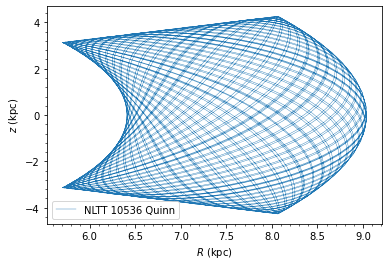

Orbital parameters:
Pericenter distance, kpc = 6.410296871943223 kpc
Maximum z, kpc = 4.26663775374653 kpc
Apocentre distance, kpc = 9.127471844409927 kpc


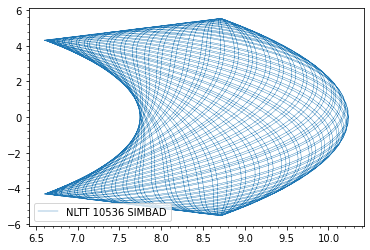

Orbital parameters:
Pericenter distance, kpc = 7.745691832943834 kpc
Maximum z, kpc = 5.550100597374417 kpc
Apocentre distance, kpc = 10.33041030980895 kpc


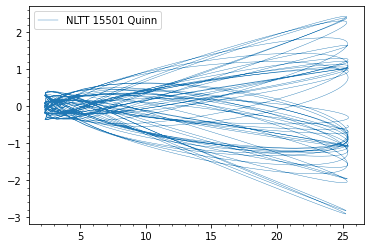

Orbital parameters:
Pericenter distance, kpc = 2.240340022627962 kpc
Maximum z, kpc = 2.9112903273544735 kpc
Apocentre distance, kpc = 25.452412198803128 kpc


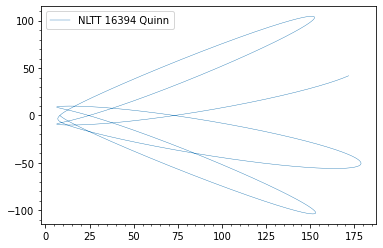

Orbital parameters:
Pericenter distance, kpc = 7.490663271084722 kpc
Maximum z, kpc = 104.64164723979852 kpc
Apocentre distance, kpc = 185.92517130668602 kpc


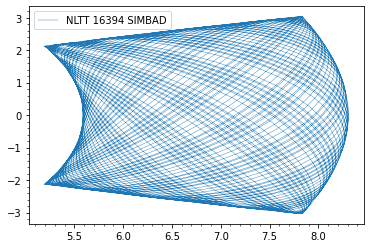

Orbital parameters:
Pericenter distance, kpc = 5.586695431445811 kpc
Maximum z, kpc = 3.0445951328692207 kpc
Apocentre distance, kpc = 8.405927282856837 kpc


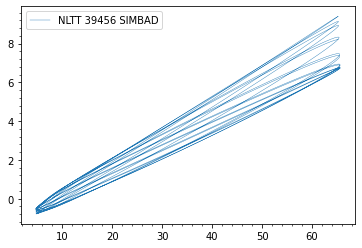

Orbital parameters:
Pericenter distance, kpc = 4.71219848045344 kpc
Maximum z, kpc = 9.4132566940417 kpc
Apocentre distance, kpc = 66.00269177542827 kpc


In [19]:
#labels = ['NLTT 10536 Quinn', 'NLTT 10536 SIMBAD', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn', 'NLTT 16394 SIMBAD', 'NLTT 39456 SIMBAD']
#labels = ['NLTT 10536 Quinn', 'NLTT 15501 Quinn', 'NLTT 16394 Quinn']
#overp = [False, True, True, True, True, True]
#xplots = ['R', 'R', '-R', 'R', 'R', 'R']
overp = [True]*len(orbits)
overp[0] = False

#print([orbits[4].ra(**get_physical(DehnenBinney98I)), orbits[4].dec(**get_physical(DehnenBinney98I)), orbits[4].dist(**get_physical(DehnenBinney98I)), orbits[4].pmra(**get_physical(DehnenBinney98I)), orbits[4].pmdec(**get_physical(DehnenBinney98I)), orbits[5].vlos(**get_physical(DehnenBinney98I))])

for orbi,label,over in zip(orbits,labels,overp):
    #if (label=='NLTT 10536 Quinn'):
    #orbi.plot(d1=xplot, d2='z', **get_physical(DehnenBinney98I), overplot=over, label=label, lw=0.4)
    orbi.plot(d1='R', d2='z', **get_physical(DehnenBinney98I), overplot=over, label=label, lw=0.4)
    plt.legend()
    plt.show()
    orbi.turn_physical_on(**get_physical(DehnenBinney98I))
    #orbi.turn_physical_on(ro=8., vo=220.)
    print('Orbital parameters:')
    #print('Energy, 100km^2 s^-2 =', orbi.E()/100.0)
    #print('Total angular Momentum, 10km kpc s^-1 =', np.sqrt(orbi.L()[0]**2.0 + orbi.L()[1]**2.0 + orbi.L()[2]**2.0)/10.0)
    print('Pericenter distance, kpc =', orbi.rperi())
    print('Maximum z, kpc =', orbi.zmax())
    print('Apocentre distance, kpc =', orbi.rap())
    #print('Eccentricity =', orbi.e())
    #print(orbi.R())
    #for i in range(N_t):
        #print(ts[i])
        #print(orbi.x(t=ts[i]))
        #if (orbi.x(t=ts[i]) > 10.0):
            #print("yaaasss")
#plt.axis([-40, 80, -50, 40])

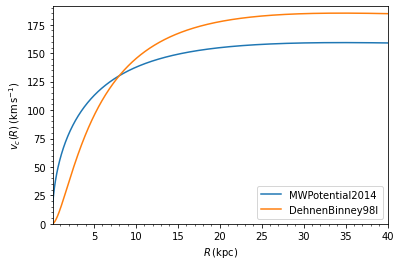

In [17]:
plotRotcurve(MWPotential2014[2],label='MWPotential2014',ro=8.,vo=220.) # need to set ro and vo explicitly, because MWPotential2014 has units turned off
plotRotcurve(DehnenBinney98I[2],overplot=True,label='DehnenBinney98I')
#plotRotcurve(Irrgang13I,overplot=True,label='AllenSantillan91')
plt.legend()

In [18]:
ro= 8.0*units.kpc
vo= 222.*units.km/units.s
rho0_halo= 0.7110*units.solMass/(units.parsec)**3.0
alpha_halo= -2.
beta_halo= 2.959
r0_halo= 3.83*units.kpc
q_halo= 0.8
amp=rho0_halo*(4*np.pi*(r0_halo)**3)
DB98_halo = TwoPowerTriaxialPotential(amp=amp,
                                         alpha=alpha_halo,beta=beta_halo,
                                         a=r0_halo,ro=ro,vo=vo,c=q_halo)
DB98_halo.turn_physical_on(ro=ro, vo=vo)
MW2014_halo = NFWPotential(a=2.,normalize=0.35)
MW2014_halo.turn_physical_on(ro=8., vo=220.)
#DB98_halo.plotDensity(phi=0.)
#MW2014_halo.plotDensity(phi=0.0)
print(MW2014_halo.dens(8.0,0.0))
print(DB98_halo.dens(8.0,0.0))

8.486837256404677e-05 solMass / pc3
0.00012820174307651662 solMass / pc3
